In [1]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def calc_I(Is,Ib,V,Gp,Vb):
    p1 = Is*(np.exp((1.2*V)/0.025))
    p2 = Gp*V
    p3 = Ib*np.exp((-1.2/0.025)*(V+Vb))
    return p1 + p2 - p3

In [11]:
V = np.linspace(start=-1.95,stop=0.7,num=200)

In [12]:
I = calc_I(0.01e-12,0.1e-12,V,0.1,1.3)

In [14]:
rand_var = np.random.uniform(low=0.8,high=1.2,size=200)

In [16]:
rand_I = rand_var*I

In [17]:
rand_I.shape

(200,)


## Polyfit

In [18]:
plt.style.use('ggplot')

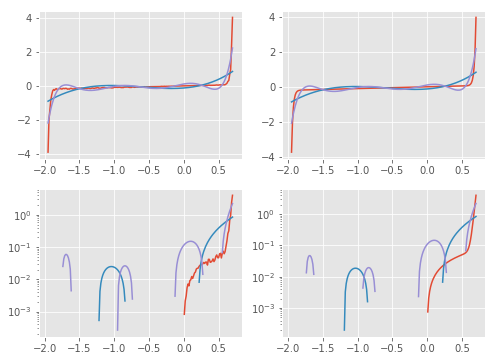

In [40]:
f1,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,6))

poly4_fitI = np.polyfit(V,I,4)
f4_I = np.poly1d(poly4_fitI)
poly4_I = f4_I(V)

poly4_fitRI = np.polyfit(V,rand_I,4)
f4_RI = np.poly1d(poly4_fitRI)
poly4_RandI = f4_RI(V)

poly8_fitI = np.polyfit(V,I,8)
f8_I = np.poly1d(poly8_fitI)
poly8_I = f8_I(V)

poly8_fitRI = np.polyfit(V,rand_I,8)
f8_RI = np.poly1d(poly8_fitRI)
poly8_RandI = f8_RI(V)



ax1.plot(V,rand_I)
ax1.plot(V,poly4_RandI)
ax1.plot(V,poly8_RandI)

ax2.plot(V,I)
ax2.plot(V,poly4_I)
ax2.plot(V,poly8_I)

ax3.semilogy(V,rand_I)
ax3.semilogy(V,poly4_RandI)
ax3.semilogy(V,poly8_RandI)

ax4.semilogy(V,I)
ax4.semilogy(V,poly4_I)
ax4.semilogy(V,poly8_I)


## Non linear fit

In [37]:
from scipy.optimize import curve_fit

In [41]:
def nonl_fit(x,a,b,c,d):
    pA = a*(np.exp((1.2*x/25e-3)) -1 )
    pB = b*x
    pC = c*(np.exp(1.2*(-(x+d)/25e-3)) -1)
    
    return pA + pB - pC

In [43]:
popt,pcov = curve_fit(nonl_fit,V,rand_I)

In [44]:
popt

array([  1.02757359e-14,   9.95835532e-02,   8.86620290e-17,
         1.15275620e+00])

In [48]:
opt_out = nonl_fit(V,*popt)

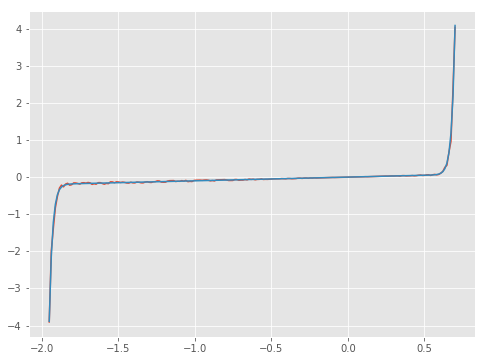

In [46]:
f1,ax1 = plt.subplots(1,1,figsize=(8,6))

ax1.plot(V,rand_I)
ax1.plot(V,opt_out)


## Free variables A,B,C and fix D

In [50]:
def Dfix_nonl(x,a,b,c):
    return nonl_fit(x,a,b,c,d=1.3)

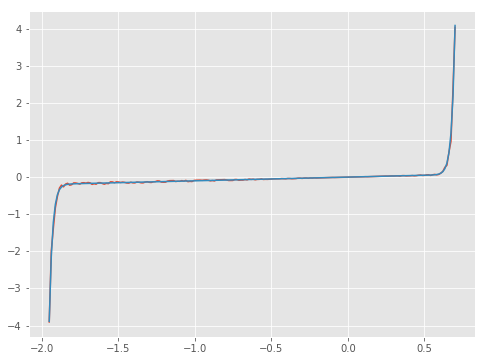

In [53]:
poptD,pcov = curve_fit(Dfix_nonl,V,rand_I)
opt_out1 = Dfix_nonl(V,*poptD)

f1,axD = plt.subplots(1,1,figsize=(8,6))

axD.plot(V,rand_I)
axD.plot(V,opt_out1)

## Free Variable A,C and fix B,D

In [58]:
def BDfix_nonl(x,a,c):
    return nonl_fit(x,a,0.1,c,d=1.3)

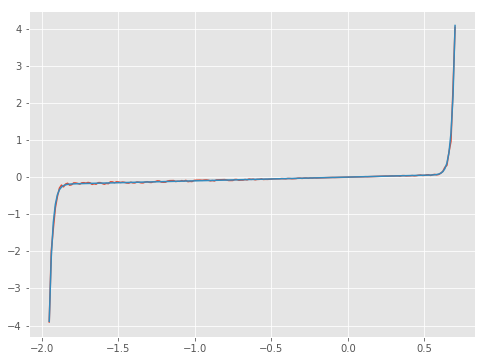

In [59]:
poptBD,pcov = curve_fit(BDfix_nonl,V,rand_I)
opt_out2 = BDfix_nonl(V,*poptBD)

f1,axBD = plt.subplots(1,1,figsize=(8,6))

axBD.plot(V,rand_I)
axBD.plot(V,opt_out2)

## MLP regression (overkill)

In [73]:
from sklearn.neural_network import MLPRegressor

In [97]:
clf = MLPRegressor(hidden_layer_sizes=(30,))

In [111]:
NN = clf.fit(V[:,None],I[:,None])

C:\SPB_Data\.conda\envs\4700\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [104]:
NNout = NN.predict(V[:,None])

In [113]:
NN.n_iter_

151

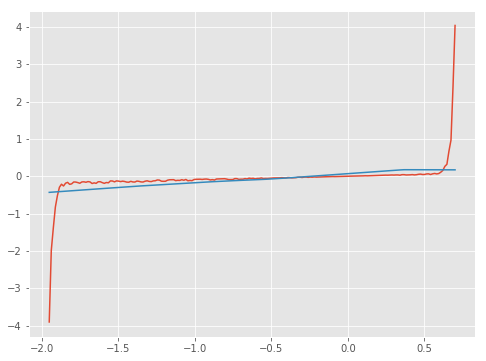

In [100]:

f1,axNN = plt.subplots(1,1,figsize=(8,6))

axNN.plot(V,rand_I)
axNN.plot(V,NNout)

In [86]:
.shape

(200,)